In [ ]:
!kaggle datasets download -d ialimustufa/object-detection-for-ppe-covid19-dataset

 92% 113M/123M [00:02<00:00, 42.1MB/s] 
100% 123M/123M [00:02<00:00, 54.5MB/s]


In [ ]:
!unzip object-detection-for-ppe-covid19-dataset.zip
clear_output()

In [ ]:
!git clone https://github.com/tensorflow/models.git
clear_output()

In [ ]:
%cd models/research
# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.

/content/models/research


In [ ]:
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
clear_output()

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2021-01-07 03:26:48.788566: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-01-07 03:26:51.727101: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-07 03:26:51.728402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-07 03:26:51.786314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-07 03:26:51.786924: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB devic

In [ ]:
import os
os.getcwd()

'/content/models/research'

In [ ]:
!ls

a3c_blogpost	    cvt_text	   lstm_object_detection  rebar
adversarial_text    deeplab	   marco		  seq_flow_lite
attention_ocr	    deep_speech    nst_blogpost		  setup.py
audioset	    delf	   object_detection	  slim
autoaugment	    efficient-hrl  pcl_rl		  vid2depth
cognitive_planning  lfads	   README.md


In [ ]:
!mkdir object_detection/images object_detection/images/train object_detection/images/test

In [ ]:
!cp /content/dataset/train/* object_detection/images/train/
!cp /content/dataset/test/* object_detection/images/test/

In [ ]:
%cd object_detection/

/content/models/research/object_detection


In [ ]:
!python xml_to_csv.py

Successfully converted xml to csv.


In [ ]:
!python record.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

2021-01-07 03:30:49.825265: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/models/research/object_detection/train.record


In [ ]:
!python record.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

2021-01-07 03:30:52.658589: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Successfully created the TFRecords: /content/models/research/object_detection/test.record


In [ ]:
!mkdir training

In [ ]:
!cp /content/tf_record_files/label_map.pbtxt ./training/

Create label_map.pbtxt

Change Cong File 

Download Weights


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2021-01-07 03:31:00--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.73.240, 2607:f8b0:4004:811::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.73.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  55.3MB/s    in 0.5s    

2021-01-07 03:31:01 (55.3 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [ ]:
!cp ./configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config ./images

In [ ]:
!python model_main_tf2.py \
    --pipeline_config_path=images/ssd_efficientdet_d0_512x512_coco17_tpu-8.config \
    --model_dir=training \
    --alsologtostderr

2021-01-07 03:33:41.681326: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-07 03:33:44.126118: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-07 03:33:44.127253: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-07 03:33:44.164428: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-07 03:33:44.165017: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-07 03:33:44.165055: I tensorflow/stream_executor/platform/default/dso_loade

Export Infernce Graph

In [ ]:
!python exporter_main_v2.py \
    --trained_checkpoint_dir=training \
    --pipeline_config_path=images/ssd_efficientdet_d0_512x512_coco17_tpu-8.config \
    --output_directory inference_graph

2021-01-07 04:16:49.675544: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-01-07 04:16:51.861635: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-07 04:16:51.865177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-07 04:16:51.901971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-07 04:16:51.902533: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-07 04:16:51.902568: I tensorflow/stream_executor/platform/default/dso_loade

Testing

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap("/content/models/research/object_detection/training/label_map.pbtxt", use_display_name=True)

In [ ]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/models/research/object_detection/inference_graph/saved_model/')

In [ ]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f2812ba29e8>

In [ ]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.8,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

In [ ]:
  # !ls

In [ ]:
def show_inference(model, image_np):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
#   image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(model, image_np)

#   print(category_index)
  # Visualization of the results of a detection.
  final_img =vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          output_dict['detection_boxes'],
          output_dict['detection_classes'],
          output_dict['detection_scores'],
          category_index,
          instance_masks=output_dict.get('detection_masks_reframed', None),
          use_normalized_coordinates=True,
          line_thickness=4)
  return(final_img)
#   display(Image.fromarray(image_np))

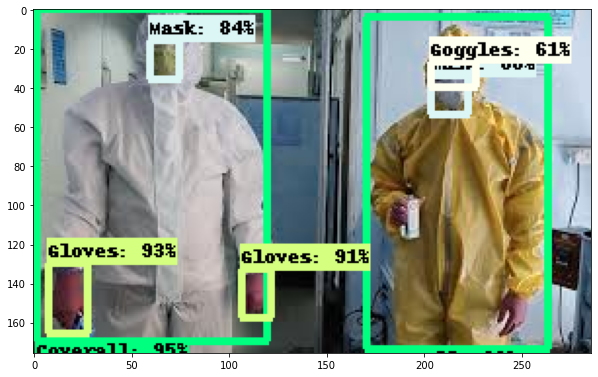

In [ ]:

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/download (1).jfif')


img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
final_img = show_inference(model,img)

final_img = cv2.cvtColor(final_img,cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10,10))
plt.imshow(final_img)

In [ ]:
!zip -r /content/file.zip /content/models/research/object_detection/inference_graph

  adding: content/models/research/object_detection/inference_graph/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph/pipeline.config (deflated 69%)
  adding: content/models/research/object_detection/inference_graph/checkpoint/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph/checkpoint/ckpt-0.index (deflated 80%)
  adding: content/models/research/object_detection/inference_graph/checkpoint/checkpoint (deflated 41%)
  adding: content/models/research/object_detection/inference_graph/checkpoint/ckpt-0.data-00000-of-00001 (deflated 36%)
  adding: content/models/research/object_detection/inference_graph/saved_model/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph/saved_model/variables/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph/saved_model/variables/variables.data-00000-of-00001 (deflated 36%)
  adding: content/models/research/object_detection/inference_graph/saved_

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>